In [36]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import math

### Retrieve RSSI data, make a 6x6 array

In [3]:
esp1data = np.zeros((7,7))
esp2data = np.zeros((7,7))
esp3data = np.zeros((7,7))

for file in os.listdir('./ble-data'):
    data = open(f"./ble-data/{file}", "r")
    esp1 = []
    esp2 = []
    esp3 = []
    for line in data.readlines():
        spl = line.split()
        if spl[0] == "esp1:":
            esp1.append(int(spl[1]))
        elif spl[0] == "esp2:":
            esp2.append(int(spl[1]))
        elif spl[0] == "esp3:":
            esp3.append(int(spl[1]))

    e1av = sum(esp1)/len(esp1)
    e2av = sum(esp2)/len(esp2)
    e3av = sum(esp3)/len(esp3)

    esp1data[int(file[1])][int(file[2])] = e1av
    esp2data[int(file[1])][int(file[2])] = e2av
    esp3data[int(file[1])][int(file[2])] = e3av


In [4]:
esp1data 

array([[-91.33333333, -74.8       , -86.14285714, -90.55555556,
        -90.        , -86.27272727, -93.        ],
       [-84.45      , -49.61538462, -85.25      , -91.2       ,
        -86.45454545, -91.        , -89.        ],
       [-94.91304348, -69.16666667, -81.70588235, -82.26315789,
        -84.63157895, -90.59090909, -94.08333333],
       [-93.09302326, -94.09677419, -88.95652174, -90.52173913,
        -92.09677419, -91.57978723, -95.29545455],
       [-94.75      , -92.45454545, -94.10526316, -91.42105263,
        -98.5       , -94.7       , -92.47826087],
       [-96.        , -95.22580645, -92.5862069 , -93.90909091,
        -91.86666667, -92.625     , -94.5       ],
       [-95.05128205, -95.72727273, -95.25      , -95.        ,
        -94.57142857, -88.        , -91.93333333]])

In [5]:
esp2data

array([[-96.33333333, -94.2       , -92.22222222, -92.44444444,
        -87.2       , -90.53846154, -92.64      ],
       [-92.        , -87.34375   , -92.70588235, -90.47826087,
        -82.46153846, -90.22222222, -92.1       ],
       [-96.52380952, -92.58823529, -91.5       , -91.3       ,
        -79.13636364, -73.05555556, -81.6875    ],
       [-98.5       , -91.14634146, -93.51428571, -79.4       ,
        -76.17073171, -51.08247423, -74.20454545],
       [-97.        , -96.66666667, -93.27272727, -89.9       ,
        -95.5       , -84.        , -77.        ],
       [-95.36666667, -96.53333333, -91.91666667, -92.92307692,
        -97.53333333, -93.58823529, -92.48148148],
       [-92.65306122, -92.23076923, -93.46666667, -91.55555556,
        -94.22222222, -96.9       , -97.41666667]])

In [6]:
esp3data

array([[-90.93333333, -93.6       , -89.        , -89.5       ,
        -89.6       , -90.        , -92.6744186 ],
       [-87.44      , -92.57142857, -87.4375    , -92.125     ,
        -88.66666667, -86.97058824, -96.19047619],
       [-84.88      , -95.        , -85.29411765, -93.1       ,
        -89.92      , -92.24      , -95.41666667],
       [-89.97142857, -86.78947368, -90.05128205, -88.20512821,
        -86.5       , -92.34183673, -94.84848485],
       [-88.61538462, -74.04      , -78.        , -81.95      ,
        -90.58823529, -91.88235294, -91.6       ],
       [-78.88888889, -63.83163265, -76.80555556, -86.91666667,
        -89.06666667, -92.5       , -92.12      ],
       [-90.68181818, -84.69230769, -87.4       , -91.375     ,
        -95.55555556, -91.2       , -95.83870968]])

### Determination of A for 3 esps

In [7]:
### Esp1
### Since the ESP is in position 1x1 and the distance between every point is 0.5m get data from 3x1 and 1x3 and average it

A_esp1 = ( esp1data[1][3] + esp1data[3][1] ) / 2

### Esp2
### Since the ESP is in position 3x5 and the distance between every point is 0.5m get data from 3x3, 1x5 and 5x5 and average it
A_esp2 = ( esp2data[3][3] + esp2data[1][5] + esp2data[5][5] ) / 3

### Esp3 
### Since the ESP is in position 5x1 and the distance between every point is 0.5m get data from 3x1 and 5x3 and average it
A_esp3 = ( esp3data[5][3] + esp1data[3][1] ) / 2

print(f"{A_esp1} {A_esp2} {A_esp3}")

-92.6483870967742 -87.7368191721133 -90.50672043010752


### Get a calculated position estimation for all of the recieved data points based on the value of A

assuming n = 2

In [8]:
# Generic function
def calculatedistances(data, A, n):
    calculated_distances = np.zeros((data.shape[0], data.shape[1]))
    for (i, j), value in np.ndenumerate(data):
        calculated_distances[i][j] = 10**((A-value)/(10*n))
    return calculated_distances

In [9]:
esp1_calculated_distances = calculatedistances(esp1data, A_esp1, 2)
esp1_calculated_distances

array([[0.85950283, 0.1281093 , 0.47285012, 0.78588396, 0.73719205,
        0.47997322, 1.04131145],
       [0.38911739, 0.00705261, 0.42665874, 0.84640973, 0.4901262 ,
        0.82714309, 0.65702311],
       [1.29787486, 0.06697519, 0.28371008, 0.30250917, 0.39733753,
        0.7890892 , 1.17963408],
       [1.05252352, 1.1814609 , 0.65374252, 0.78283025, 0.93846775,
        0.88423969, 1.35629254],
       [1.27373958, 0.97793033, 1.18261614, 0.86822698, 1.96146537,
        1.26642841, 0.98060406],
       [1.47089152, 1.34546055, 0.9928668 , 1.15620593, 0.9139322 ,
        0.99731108, 1.23760098],
       [1.31869618, 1.4254247 , 1.3492134 , 1.31093345, 1.24782038,
        0.58557246, 0.92097388]])

In [10]:
esp2_calculated_distances = calculatedistances(esp2data, A_esp2, 2)
esp2_calculated_distances

array([[2.69045485, 2.104549  , 1.6759851 , 1.71941719, 0.94006751,
        1.3806453 , 1.75856749],
       [1.63365009, 0.95575492, 1.77195692, 1.37110933, 0.54479858,
        1.33128228, 1.65256687],
       [2.75010653, 1.74811825, 1.54226514, 1.5071589 , 0.37151574,
        0.1844747 , 0.49834952],
       [3.45270156, 1.48073082, 1.94479275, 0.38296496, 0.26405575,
        0.01469883, 0.21056506],
       [2.90508632, 2.79571164, 1.89145235, 1.28280027, 2.44432552,
        0.65036782, 0.29050863],
       [2.40709026, 2.75312359, 1.61805163, 1.81682412, 3.08905548,
        1.96142093, 1.72676452],
       [1.76121389, 1.6776351 , 1.9341599 , 1.55216119, 2.10994023,
        2.87183207, 3.04784148]])

In [11]:
esp3_calculated_distances = calculatedistances(esp3data, A_esp3, 2)
esp3_calculated_distances

array([[1.05034179, 1.42778882, 0.84074439, 0.89056163, 0.90087385,
        0.94333072, 1.2834676 ],
       [0.70252855, 1.26833918, 0.70232638, 1.20479728, 0.80909089,
        0.66556947, 1.92392345],
       [0.52319547, 1.6775056 , 0.5487441 , 1.34791957, 0.93468221,
        1.2208547 , 1.75993777],
       [0.94023282, 0.65183498, 0.94891668, 0.76722084, 0.63046935,
        1.23525271, 1.64849723],
       [0.80432804, 0.15019794, 0.23695396, 0.37339111, 1.00942892,
        1.1716061 , 1.13413298],
       [0.26248738, 0.04637091, 0.20651032, 0.66145044, 0.84722217,
        1.25795174, 1.20410394],
       [1.02036344, 0.51201108, 0.69930072, 1.10513155, 1.78830568,
        1.08308858, 1.84756388]])

### Estimate a value of n based on data at 1m and 0.5m and calculate distances

In [12]:
### Determination of average RSSI values at 0.5m using the 4 data 

def determineaverage_05(data, x, y):
    return (data[x-1][y] + data[x][y-1] + data[x+1][y] + data[x][y+1]) / 4

esp1_05_av = determineaverage_05(esp1data, 1, 1)
esp2_05_av = determineaverage_05(esp2data, 3, 5)
esp3_05_av = determineaverage_05(esp3data, 5, 1)

print(f"{esp1_05_av} {esp2_05_av} {esp3_05_av}")

-78.41666666666667 -76.85770817935452 -78.60668803418802


In [13]:
### Determine the values of n based on datas of each esp and average them

def determine_n(A, distance, RSSI):
    return (A - RSSI)/(10 * math.log10(distance))

n_e1 = determine_n(A_esp1, 0.5, esp1_05_av)
n_e2 = determine_n(A_esp2, 0.5, esp2_05_av)
n_e3 = determine_n(A_esp3, 0.5, esp3_05_av)

n_av = (n_e1 + n_e2 + n_e3) / 3
n_av

4.098247611189158

In [14]:
esp1_calculated_distances_n = calculatedistances(esp1data, A_esp1, n_av)
esp1_calculated_distances_n

array([[0.92877775, 0.366849  , 0.69384217, 0.88906498, 0.86174262,
        0.69892345, 1.01995167],
       [0.63089028, 0.08911807, 0.6598943 , 0.92184601, 0.70609981,
        0.91154528, 0.81466095],
       [1.13568827, 0.26731924, 0.54074874, 0.55794761, 0.63735953,
        0.8908327 , 1.08396099],
       [1.02529637, 1.08477988, 0.81267332, 0.88737739, 0.96948317,
        0.94172792, 1.16035326],
       [1.12533226, 0.98916817, 1.08529738, 0.93336651, 1.38925924,
        1.12217538, 0.99048706],
       [1.20720663, 1.1558215 , 0.99651252, 1.07340106, 0.95702988,
        0.99868687, 1.10963616],
       [1.14454337, 1.18884951, 1.15739368, 1.14125039, 1.11409829,
        0.77015161, 0.96062129]])

In [15]:
esp2_calculated_distances_n = calculatedistances(esp2data, A_esp2, n_av)
esp2_calculated_distances_n

array([[1.62091683, 1.43782477, 1.28660979, 1.30277443, 0.97028932,
        1.17047451, 1.31716721],
       [1.27064573, 0.97815763, 1.32205184, 1.16652224, 0.74349765,
        1.14986143, 1.2778049 ],
       [1.63835676, 1.31334196, 1.23544707, 1.22164215, 0.6167982 ,
        0.43829578, 0.71185664],
       [1.83074921, 1.21114081, 1.38348378, 0.6260024 , 0.52213124,
        0.12752911, 0.46752347],
       [1.68278196, 1.65155975, 1.36483416, 1.12923172, 1.54677391,
        0.81062333, 0.54703408],
       [1.53522988, 1.63923367, 1.26471041, 1.33828367, 1.73396984,
        1.38924388, 1.30548821],
       [1.31813416, 1.28722779, 1.37978727, 1.23930938, 1.43962109,
        1.67335382, 1.72264106]])

In [16]:
esp3_calculated_distances_n = calculatedistances(esp3data, A_esp2, n_av)
esp3_calculated_distances_n

array([[1.19673253, 1.39016247, 1.07355046, 1.10413658, 1.11035759,
        1.13559412, 1.31971681],
       [0.98346161, 1.31210238, 0.98332348, 1.27960098, 1.05363188,
        0.95786311, 1.60795882],
       [0.85170989, 1.50392611, 0.871759  , 1.35165303, 1.13050134,
        1.28789555, 1.53954876],
       [1.13377264, 0.94816546, 1.13887078, 1.02666098, 0.93286925,
        1.29528557, 1.4911778 ],
       [1.05060046, 0.46322116, 0.5786488 , 0.72243324, 1.17375234,
        1.26227452, 1.24240792],
       [0.60828141, 0.26103417, 0.54109038, 0.9549656 , 1.07757914,
        1.30684722, 1.27924157],
       [1.17994009, 0.84277544, 0.98125388, 1.22680083, 1.5516095 ,
        1.21479765, 1.57649131]])

### Calculate actual distance from each esp to the points on grid using pythagoras theorem

In [17]:
## Generic function
def getdistancesfromgrid(gridsizex, gridsizey, pointx, pointy, unitdistance):
    distances = np.zeros((gridsizex, gridsizey))
    for (i,j), data in np.ndenumerate(distances):
        distances[i][j] = math.sqrt(abs(i-pointx)**2 + abs(j-pointy)**2) * unitdistance
        # print(f"{i} {j} {distances[i][j]}")
    return distances

In [18]:
esp1_actual_distances = getdistancesfromgrid(7, 7, 1, 1, 0.5)
esp1_actual_distances

array([[0.70710678, 0.5       , 0.70710678, 1.11803399, 1.58113883,
        2.06155281, 2.54950976],
       [0.5       , 0.        , 0.5       , 1.        , 1.5       ,
        2.        , 2.5       ],
       [0.70710678, 0.5       , 0.70710678, 1.11803399, 1.58113883,
        2.06155281, 2.54950976],
       [1.11803399, 1.        , 1.11803399, 1.41421356, 1.80277564,
        2.23606798, 2.6925824 ],
       [1.58113883, 1.5       , 1.58113883, 1.80277564, 2.12132034,
        2.5       , 2.91547595],
       [2.06155281, 2.        , 2.06155281, 2.23606798, 2.5       ,
        2.82842712, 3.20156212],
       [2.54950976, 2.5       , 2.54950976, 2.6925824 , 2.91547595,
        3.20156212, 3.53553391]])

In [19]:
esp2_actual_distances = getdistancesfromgrid(7, 7, 3, 5, 0.5)
esp2_actual_distances

array([[2.91547595, 2.5       , 2.12132034, 1.80277564, 1.58113883,
        1.5       , 1.58113883],
       [2.6925824 , 2.23606798, 1.80277564, 1.41421356, 1.11803399,
        1.        , 1.11803399],
       [2.54950976, 2.06155281, 1.58113883, 1.11803399, 0.70710678,
        0.5       , 0.70710678],
       [2.5       , 2.        , 1.5       , 1.        , 0.5       ,
        0.        , 0.5       ],
       [2.54950976, 2.06155281, 1.58113883, 1.11803399, 0.70710678,
        0.5       , 0.70710678],
       [2.6925824 , 2.23606798, 1.80277564, 1.41421356, 1.11803399,
        1.        , 1.11803399],
       [2.91547595, 2.5       , 2.12132034, 1.80277564, 1.58113883,
        1.5       , 1.58113883]])

In [20]:
esp3_actual_distances = getdistancesfromgrid(7, 7, 5, 1, 0.5)
esp3_actual_distances

array([[2.54950976, 2.5       , 2.54950976, 2.6925824 , 2.91547595,
        3.20156212, 3.53553391],
       [2.06155281, 2.        , 2.06155281, 2.23606798, 2.5       ,
        2.82842712, 3.20156212],
       [1.58113883, 1.5       , 1.58113883, 1.80277564, 2.12132034,
        2.5       , 2.91547595],
       [1.11803399, 1.        , 1.11803399, 1.41421356, 1.80277564,
        2.23606798, 2.6925824 ],
       [0.70710678, 0.5       , 0.70710678, 1.11803399, 1.58113883,
        2.06155281, 2.54950976],
       [0.5       , 0.        , 0.5       , 1.        , 1.5       ,
        2.        , 2.5       ],
       [0.70710678, 0.5       , 0.70710678, 1.11803399, 1.58113883,
        2.06155281, 2.54950976]])

### Calculate accuracies

In [21]:
## generic function
def compare_accuracy(actual, calculated):
    sum = 0
    count = 0
    for (i,j), data in np.ndenumerate(calculated):
        sum += abs(data-actual[i][j])
        count += 1
    return sum/count

In [22]:
esp1_acc = compare_accuracy(esp1_actual_distances, esp1_calculated_distances)
esp2_acc = compare_accuracy(esp2_actual_distances, esp2_calculated_distances)
esp3_acc = compare_accuracy(esp3_actual_distances, esp3_calculated_distances)

print(f"{esp1_acc} {esp2_acc} {esp3_acc}")


0.9475549301269931 0.5183022985194193 0.8877960733300515


In [23]:
esp1_acc_n = compare_accuracy(esp1_actual_distances, esp1_calculated_distances_n)
esp2_acc_n = compare_accuracy(esp2_actual_distances, esp2_calculated_distances_n)
esp3_acc_n = compare_accuracy(esp3_actual_distances, esp3_calculated_distances_n)

print(f"{esp1_acc_n} {esp2_acc_n} {esp3_acc_n}")


0.9407473122812394 0.49655714456338323 0.7866041619526052


In [24]:
av_acc = (esp1_acc + esp2_acc + esp3_acc) / 3
av_acc_n = (esp1_acc_n + esp2_acc_n + esp3_acc_n) / 3

print(f"{av_acc} {av_acc_n}")

0.7845511006588213 0.7413028729324093


### Average out values of corresponding equidistant places and make an array

In [32]:
## Generic function

def create_quidistant_average_matrix(data: np.array, x, y):
    rows, columns = data.shape
    avg_matrix = np.zeros((max(x,rows-x), max(y,columns-y)))

    for (i,j), dat in np.ndenumerate(avg_matrix):
        if i == 0 and j == 0:
            avg_matrix[i][j] = data[x][y]
        else:
            # x,y
            if (i+x) in range(rows) and (j+y) in range(columns):
                sum = data[i+x][j+y]
                count = 1
            # x,-y
            if (i+x) in range(rows) and (j-y) in range(columns):
                sum += data[i+x][j-y]
                count += 1
            # -x,y
            if (i-x) in range(rows) and (j+y) in range(columns):
                sum += data[i-x][j+y]
                count += 1
            # -x, -y
            if (i-x) in range(rows) and (j-y) in range(columns):
                sum += data[i-x][j-y]
                count += 1

            avg_matrix[i][j] = sum/count

    return avg_matrix
            
            

    # print(f"{rows} {columns}")



In [33]:
create_quidistant_average_matrix(esp1data, 1, 1)

array([[-49.61538462, -84.85      , -70.40769231, -85.85227273,
        -91.1       , -87.72727273],
       [-71.98333333, -88.52377908, -79.19634503, -85.62007961,
        -87.42058745, -90.42872807],
       [-71.8560794 , -87.93738625, -81.35847448, -88.18946035,
        -91.07538159, -90.71169355],
       [-80.81060606, -91.36854725, -83.82635566, -89.73568111,
        -89.7437799 , -92.42329329],
       [-94.66129032, -92.65893797, -93.43835267, -91.37654237,
        -92.15890432, -93.43972385],
       [-94.09090909, -94.7891363 , -93.6507177 , -95.60667293,
        -92.28026316, -94.37075569]])

In [34]:
create_quidistant_average_matrix(esp2data, 3, 5)

array([[-51.08247423, -74.20454545, -74.20454545, -74.20454545,
        -74.20454545],
       [-84.        , -77.        , -77.        , -77.        ,
        -77.        ],
       [-93.58823529, -92.48148148, -92.48148148, -92.48148148,
        -92.48148148],
       [-93.71923077, -95.02833333, -95.02833333, -95.02833333,
        -95.02833333]])

In [35]:
create_quidistant_average_matrix(esp3data, 5, 1)

array([[-63.83163265, -77.84722222, -75.37414966, -82.93611111,
        -89.70833333, -90.59333333],
       [-84.69230769, -89.04090909, -88.03365385, -91.47777778,
        -91.2875    , -95.69713262],
       [-95.69713262, -95.69713262, -95.69713262, -95.69713262,
        -95.69713262, -95.69713262],
       [-95.69713262, -95.69713262, -95.69713262, -95.69713262,
        -95.69713262, -95.69713262],
       [-95.69713262, -95.69713262, -95.69713262, -95.69713262,
        -95.69713262, -95.69713262]])

### Create scatter plot of recieved RSSI data

In [68]:
## Generic function
def createscatter(data: np.array):
    rows, cols = data.shape

    x = []
    y = []
    area = []

    for (i,j), dat in np.ndenumerate(data):
        x.append(i)
        y.append(j)
        area.append((100+dat)*10)

    plt.scatter(x, y, s = area)
    plt.show()

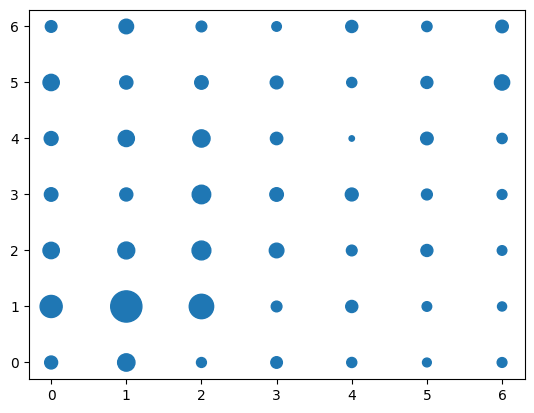

In [69]:
createscatter(esp1data)

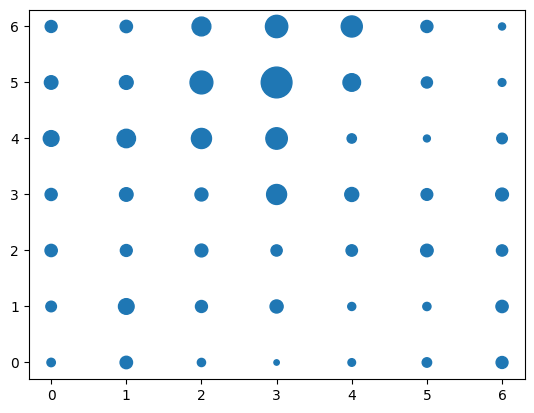

In [70]:
createscatter(esp2data)

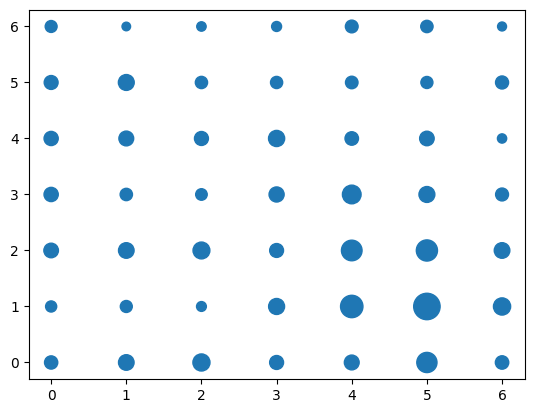

In [71]:
createscatter(esp3data)